In [1]:
import sklearn
import numpy as np
from tqdm import tqdm_notebook, tnrange

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_x = np.load("../../tile_data/processed/data_x_l2a_processed.npy")
data_y = np.load("../../tile_data/processed/data_y_l2a_processed.npy")
lengths = np.load("../../tile_data/processed/length_l2a_processed.npy")

data_x = np.delete(data_x, 14, -1) 

In [3]:
from scipy.ndimage import median_filter
from skimage.transform import resize
for sample in tnrange(0, len(data_x)):
    filtered = median_filter(data_x[sample, 0, :, :, 10], size = 5)
    filtered = np.reshape(filtered, (8, 2, 8, 2))
    filtered = np.mean(filtered, axis = (1, 3))
    filtered = resize(filtered, (16, 16), 0)
    data_x[sample, :, :, :, 10] = np.stack([filtered] * 24)
    
#data_x = np.delete(data_x, 10, -1)
print(data_x.shape)


(3670, 24, 16, 16, 16)


In [4]:
below_1 = [i for i, val in enumerate(data_x[:, :, :, :, :-2]) if np.min(val) < -1.5]
above_1 = [i for i, val in enumerate(data_x[:, :, :, :, :-2]) if np.max(val) > 1.5]
min_vals = [np.min(val) for i, val in enumerate(data_x[:, :, :, :, :-2]) if np.min(val) < -1.5]
max_vals = [np.max(val) for i, val in enumerate(data_x[:, :, :, :, :-2]) if np.max(val) > 1.5]
nans = [i for i, val in enumerate(data_x) if np.sum(np.isnan(val)) > 0]
oob_vals = [i for i, val in enumerate(data_x) if np.max(val[:, :, :, 0]) > 0.7]
print(oob_vals)

outliers = below_1 + above_1 + nans + oob_vals
outliers = list(set(outliers))
print("The outliers are: {}, totalling {}".format(outliers, len(outliers)))
print("\n")
print(min_vals, max_vals)
data_x = data_x[[x for x in range(0, len(data_x)) if x not in outliers]]
data_y = data_y[[x for x in range(0, len(data_y)) if x not in outliers]]
lengths = lengths[[x for x in range(0, len(lengths)) if x not in outliers]]

[3370]
The outliers are: [2065, 3370], totalling 2


[] [1.5207762]


In [5]:
min_all = [0.020395646858960392,
 0.03833778686821461,
 0.022913980782032013,
 0.08838867269456387,
 0.05731564749032259,
 0.0796274145692587,
 0.08639285631477833,
 0.08918419919908048,
 0.07416137464344502,
 0.04398707151412964,
 0.0,
 0.008659180235117674,
 -0.0134716229327023,
 0.006902076792903247,
 0.006362500241957605,
 4.999999873689376e-05]

max_all = [0.18219037026166907,
 0.27367106080055237,
 0.3996005910634992,
 0.4859166720509528,
 0.4492199122905731,
 0.46700127094984045,
 0.49433933556079857,
 0.5116616946458816,
 0.6353135156631469,
 0.5636022371053693,
 0.3590170443058014,
 0.693415229320526,
 0.3948741647601127,
 0.6290205121040344,
 0.8152220940589849,
 0.14367499947547913]



#min_all = []
#max_all = []

for band in range(0, data_x.shape[-1]):
    mins1 = np.percentile(data_x[:, :, :, :, band], 1)
    maxs1 = np.percentile(data_x[:, :, :, :, band], 99)
    #mins, maxs = (np.min(data_x[:, :, :, :, band]), np.max(data_x[:, :, :, :, band]))
    mins = min_all[band]
    maxs = max_all[band]
    data_x[:, :, :, :, band] = np.clip(data_x[:, :, :, :, band], mins, maxs)
    midrange = (maxs + mins) / 2
    rng = maxs - mins
    standardized = (data_x[:, :, :, :, band] - midrange) / (rng / 2)
    data_x[:, :, :, :, band] = standardized
    
    #min_all.append(mins)
    #max_all.append(maxs)
    
print("The data has been scaled to [{}, {}]".format(np.min(data_x), np.max(data_x)))

The data has been scaled to [-1.0000001192092896, 1.0000001192092896]


In [6]:
data_x = np.mean(data_x, axis = 1)
data_x = data_x[:, 1:15, 1:15, :]
data_x = np.reshape(data_x, (data_x.shape[0]*data_x.shape[1]*data_x.shape[2], data_x.shape[-1]))
data_y = np.reshape(data_y, (data_y.shape[0]*14*14))

In [7]:
test_x = np.load("../../tile_data/processed/test_x_l2a_processed.npy")
test_y = np.load("../../tile_data/processed/test_y_l2a_processed.npy")
test_lengths = np.load("../../tile_data/processed/test_length_l2a_processed.npy")

test_x = np.delete(test_x, 14, -1)
#test_x = np.delete(test_x, 13, -1)


below_1 = [i for i, val in enumerate(test_x[:, :, :, :, :-2]) if np.min(val) < -1.5]
above_1 = [i for i, val in enumerate(test_x[:, :, :, :, :-2]) if np.max(val) > 1.5]
min_vals = [np.min(val) for i, val in enumerate(test_x[:, :, :, :, :-2]) if np.min(val) < -1.5]
max_vals = [np.max(val) for i, val in enumerate(test_x[:, :, :, :, :-2]) if np.max(val) > 1.5]
nans = [i for i, val in enumerate(test_x) if np.sum(np.isnan(val)) > 0]
outliers = below_1 + above_1 + nans
outliers = list(set(outliers))
print("The outliers are: {}, totalling {}".format(outliers, len(outliers)))
print("\n")
print(min_vals, max_vals)

for i in range(len(test_x)):
    mins = np.min(test_x[i, :, :, :, :])
    maxs = np.max(test_x[i, :, :, :, :])
    if mins < -1 or maxs > 1:
        offender_max = np.argmax(np.max(test_x[i, :, :, :, :], (0, 1, 2)), -1)
        offender_min = np.argmin(np.min(test_x[i, :, :, :, :], (0, 1, 2)), -1)
        
        print("{} Offender max/min: {} {}".format(i, offender_max, offender_min))
test_x = test_x[[x for x in range(0, len(test_x)) if x not in outliers]]
test_y = test_y[[x for x in range(0, len(test_y)) if x not in outliers]]
test_lengths = test_lengths[[x for x in range(0, len(test_lengths)) if x not in outliers]]

for sample in tnrange(0, len(test_x)):
    filtered = median_filter(test_x[sample, 0, :, :, 10], size = 5)
    filtered = np.reshape(filtered, (8, 2, 8, 2))
    filtered = np.mean(filtered, axis = (1, 3))
    filtered = resize(filtered, (16, 16), 0)
    test_x[sample, :, :, :, 10] = np.stack([filtered] * 24)

#test_x = np.delete(test_x, 10, -1)
    
for band in range(0, test_x.shape[-1]):
    mins = min_all[band]
    maxs = max_all[band]
    test_x[:, :, :, :, band] = np.clip(test_x[:, :, :, :, band], mins, maxs)
    midrange = (maxs + mins) / 2
    rng = maxs - mins
    standardized = (test_x[:, :, :, :, band] - midrange) / (rng / 2)
    test_x[:, :, :, :, band] = standardized
    
    
print("The data has been scaled to [{}, {}]".format(np.min(test_x), np.max(test_x)))
print(test_x.shape)

The outliers are: [], totalling 0


[] []
9 Offender max/min: 14 10
14 Offender max/min: 14 10
16 Offender max/min: 14 12
21 Offender max/min: 14 10
27 Offender max/min: 14 10
29 Offender max/min: 14 10
30 Offender max/min: 14 10
32 Offender max/min: 14 12
45 Offender max/min: 14 10
51 Offender max/min: 14 10
53 Offender max/min: 14 10
60 Offender max/min: 14 10
64 Offender max/min: 14 12
69 Offender max/min: 14 11
75 Offender max/min: 14 10
85 Offender max/min: 14 10
86 Offender max/min: 14 10
118 Offender max/min: 14 10
120 Offender max/min: 14 12
122 Offender max/min: 14 12
127 Offender max/min: 14 12
129 Offender max/min: 14 12
135 Offender max/min: 14 10
136 Offender max/min: 14 10
140 Offender max/min: 14 12
141 Offender max/min: 14 12
142 Offender max/min: 14 12
145 Offender max/min: 14 10
146 Offender max/min: 14 12
149 Offender max/min: 14 12
150 Offender max/min: 14 10
151 Offender max/min: 14 12
154 Offender max/min: 14 12
157 Offender max/min: 14 12
163 Offender max/min: 14


The data has been scaled to [-1.0000001192092896, 1.0000001192092896]
(542, 24, 16, 16, 16)


In [8]:
test_x = np.mean(test_x, axis = 1)
test_x = test_x[:, 1:15, 1:15, :]
test_x = np.reshape(test_x, (test_x.shape[0]*test_x.shape[1]*test_x.shape[2], test_x.shape[-1]))
test_y = np.reshape(test_y, (test_y.shape[0]*14*14))

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(data_x, data_y)
#y_pred = regressor.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [16]:
y_pred = clf.predict(test_x)
y_pred[np.where(y_pred >= 0.1)] = 1.
y_pred[np.where(y_pred < 0.1)] = 0.

In [17]:
print(sklearn.metrics.classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     75297
         1.0       0.86      0.59      0.70     30935

    accuracy                           0.85    106232
   macro avg       0.86      0.78      0.80    106232
weighted avg       0.85      0.85      0.84    106232



In [24]:
path = "../../tile_data/honduras_large/processed/"

def standardize_tile(arr):
    for x in range(0, arr.shape[-1]):
        mins = min_all[x]
        maxs = max_all[x]
        arr[:, :, :, x] = np.clip(arr[:, :, :, x], mins, maxs)
        midrange = (maxs + mins) / 2
        rng = maxs - mins
        standardized = (arr[:, :, :, x] - midrange) / (rng / 2)
        arr[:, :, :, x] = standardized
        mins, maxs = (np.min(arr[:, :, :, x]), np.max(arr[:, :, :, x]))
    return arr

def predict_tile(y, x, path = path):
    tile_x = np.load(path + str(y) + "/" + str(x) + ".npy")
    tile_x = np.delete(tile_x, 14, -1)
    tile_x = standardize_tile(tile_x)
    tile_x = np.mean(tile_x, axis = 0)
    tile_x[np.isnan(tile_x)] = 0.
    tile_x = tile_x[1:-1, 1:-1, :]
     
    tile_x = np.reshape(tile_x, (tile_x.shape[0]*tile_x.shape[1], tile_x.shape[-1]))
    tile_y = clf.predict(tile_x)
    tile_y = np.reshape(tile_y, (126, 126))
    return tile_y

tile_y = predict_tile(0, 1)

In [25]:
all_preds = []
for row in tnrange(5, 10):
    pred_i = [predict_tile(row, col) for col in range(10, 20)]
    pred_i = np.concatenate(pred_i, axis = 1)
    all_preds.append(pred_i)
all_preds.reverse()
stacked = np.concatenate(all_preds, axis = 0)
#stacked = stacked[400:600, 400:500]

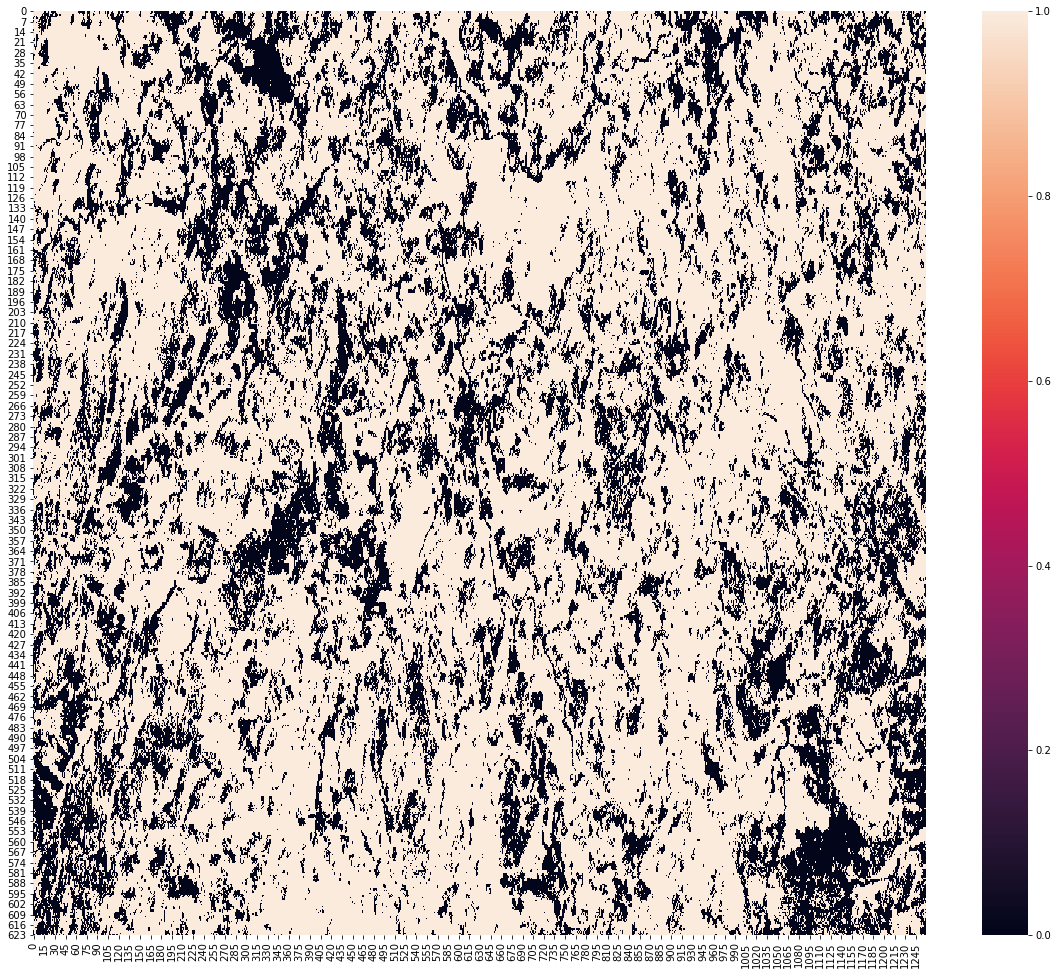

In [26]:
plt.figure(figsize=(20, 17))
#stacked[np.where(stacked >= 0.35)] = 1.
#stacked[np.where(stacked < 0.35)] = 0.
sns.heatmap(stacked)


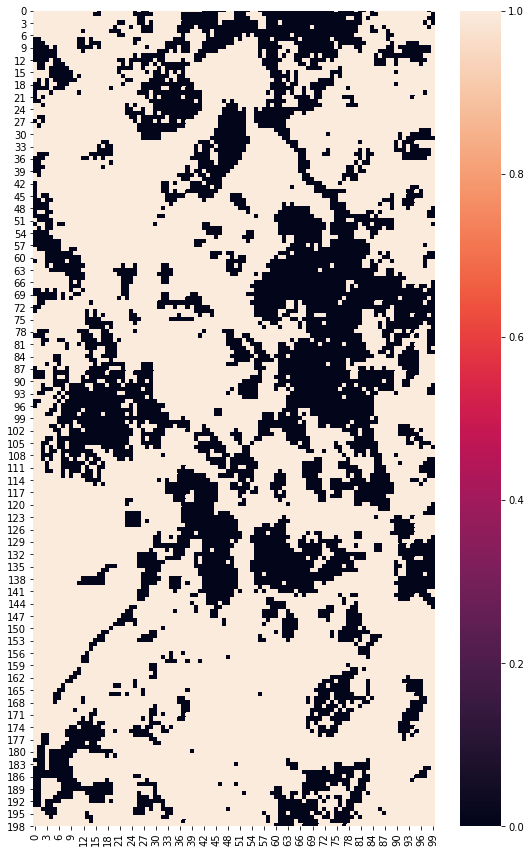

In [29]:
plt.figure(figsize=(9, 15))
sns.heatmap(stacked[200:400, 1800-1260:1900-1260])

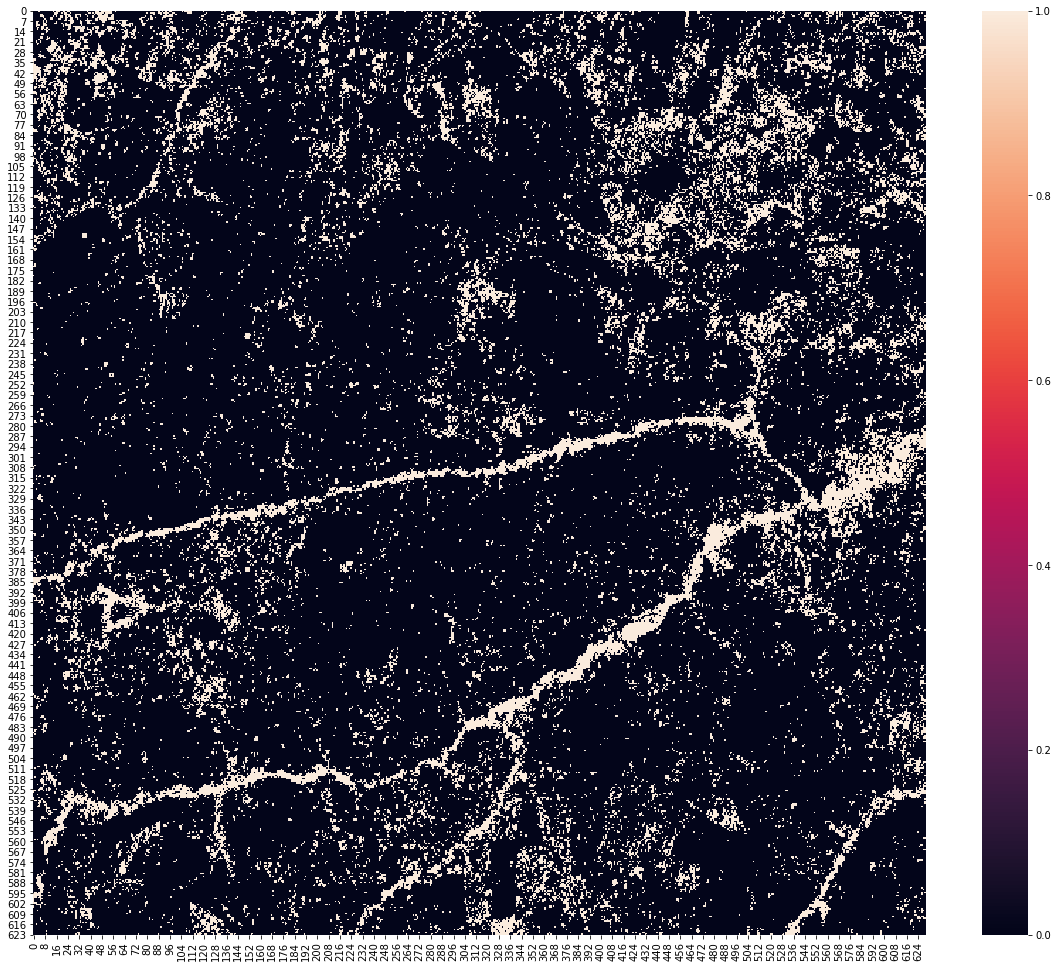

In [138]:
plt.figure(figsize=(20, 17))
stacked[np.where(stacked >= 0.4)] = 1.
stacked[np.where(stacked < 0.4)] = 0.
sns.heatmap(stacked)

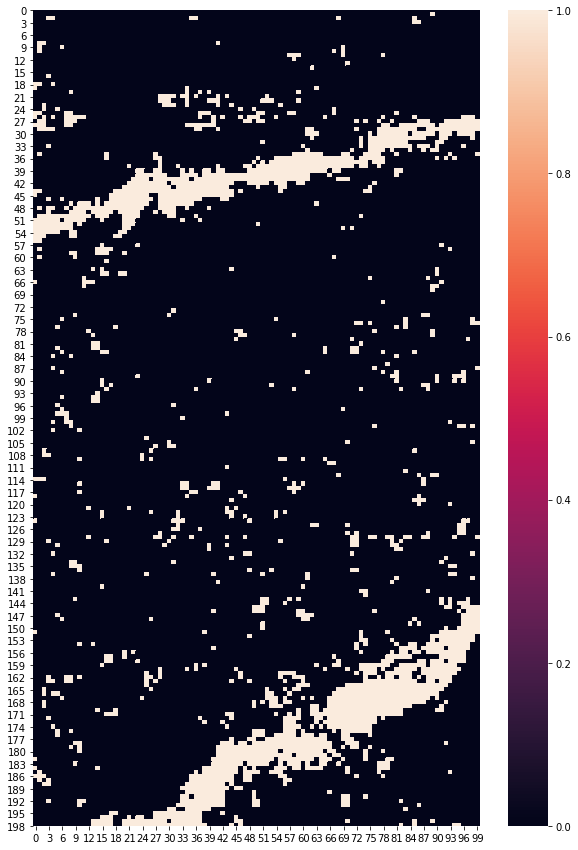

In [140]:
stacked = stacked[250:450, 350:450]
plt.figure(figsize=(10, 15))
sns.heatmap(stacked)